In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from datetime import datetime, timedelta
import pprint

import matplotlib as mpl
from matplotlib import pylab as plt

import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters

import option_pricing as op

import td
from td.client import TDClient
from td.option_chain import OptionChain

register_matplotlib_converters()


In [4]:
# margin account
AccountId = '870008897'
CredentialsPath = './TDAmeritradeState-Real.json'

# margin paper account
#AccountId = 'D-11381265' 
#CredentialsPath = './TDAmeritradeState-Paper.json'

# Create a new session
TDSession = TDClient(
    account_number = AccountId,
    client_id = 'KYAPSIFUUPRBMCFY8PDXFWSDGILPI2S3',
    redirect_uri = 'https://gnosko.obolary.com',
    credentials_path = CredentialsPath
)

# Login to the session
TDSession.login()
print(TDSession)


Their is no state file to load, will use default state.
Please go to URL provided authorize your account: https://auth.tdameritrade.com/auth/?response_type=code&redirect_uri=https%3A%2F%2Fgnosko.obolary.com&client_id=KYAPSIFUUPRBMCFY8PDXFWSDGILPI2S3%40AMER.OAUTHAP
<TDAmeritrade Client (logged_in = True, authorized = True)>


In [7]:
market_hours = TDSession.get_market_hours(
    markets=['EQUITY','OPTION'], 
    date="2020-05-28" 
)
market_hours

{'equity': {'EQ': {'date': '2020-05-28',
   'marketType': 'EQUITY',
   'exchange': 'NULL',
   'category': 'NULL',
   'product': 'EQ',
   'productName': 'equity',
   'isOpen': True,
   'sessionHours': {'preMarket': [{'start': '2020-05-28T07:00:00-04:00',
      'end': '2020-05-28T09:30:00-04:00'}],
    'regularMarket': [{'start': '2020-05-28T09:30:00-04:00',
      'end': '2020-05-28T16:00:00-04:00'}],
    'postMarket': [{'start': '2020-05-28T16:00:00-04:00',
      'end': '2020-05-28T20:00:00-04:00'}]}}},
 'option': {'EQO': {'date': '2020-05-28',
   'marketType': 'OPTION',
   'exchange': 'NULL',
   'category': 'NULL',
   'product': 'EQO',
   'productName': 'equity option',
   'isOpen': True,
   'sessionHours': {'regularMarket': [{'start': '2020-05-28T09:30:00-04:00',
      'end': '2020-05-28T16:00:00-04:00'}]}},
  'IND': {'date': '2020-05-28',
   'marketType': 'OPTION',
   'exchange': 'NULL',
   'category': 'NULL',
   'product': 'IND',
   'productName': 'index option',
   'isOpen': True,


In [8]:
historical = TDSession.get_price_history(
    symbol = 'SLV', 
    period_type = 'year',
    period = 2, 
    frequency_type = 'daily',
    frequency = 1, 
    extended_hours = True
)


In [9]:
dataset = pd.DataFrame.from_dict( historical['candles'] )
dataset = dataset.set_index( ['datetime'] )
dataset.index = pd.to_datetime( dataset.index, unit='ms' )

print( '** head' )
print( dataset.head() )

print( '' )
print( '** size' )
print( dataset['close'].size )


** head
                      open    high      low  close   volume
datetime                                                   
2018-05-22 05:00:00  15.66  15.690  15.5523  15.58  5562559
2018-05-23 05:00:00  15.40  15.530  15.3700  15.50  7300124
2018-05-24 05:00:00  15.61  15.720  15.5900  15.69  7045977
2018-05-25 05:00:00  15.65  15.670  15.5200  15.53  5169641
2018-05-29 05:00:00  15.42  15.505  15.3900  15.44  9718176

** size
505


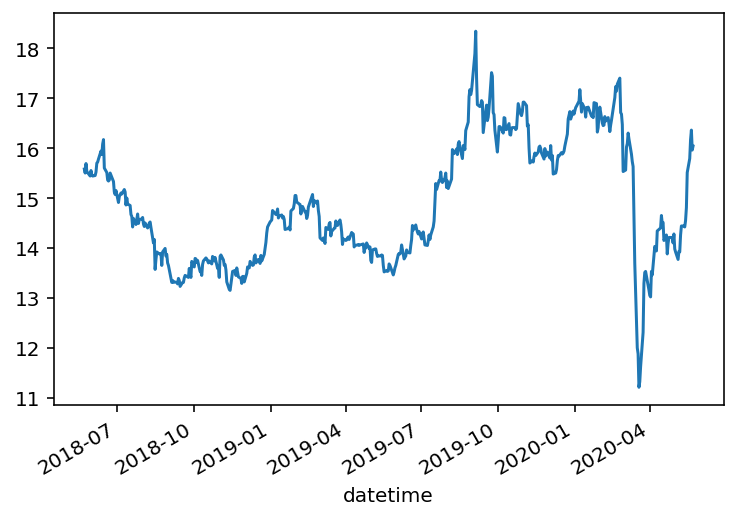

In [10]:
_ = dataset['close'].plot()


In [7]:
chain = TDSession.get_options_chain( 
    option_chain = {
        'symbol': 'SLV',
        'contractType': 'CALL',
        'strikeCount': '4',
        'includeQuotes': 'TRUE',
        'strategy': 'SINGLE',
        'strike': '16.50',
        'range': 'ALL',
        'optionType': 'ALL',
        'toDate': '2020-06-05'
    } 
)
chain


{'symbol': 'SLV',
 'status': 'SUCCESS',
 'underlying': {'symbol': 'SLV',
  'description': 'iShares Silver Trust',
  'change': -0.09,
  'percentChange': -0.53,
  'close': 16.04,
  'quoteTime': 1590512773143,
  'tradeTime': 1590512759395,
  'bid': 15.95,
  'ask': 15.96,
  'last': 15.95,
  'mark': 15.96,
  'markChange': -0.09,
  'markPercentChange': -0.53,
  'bidSize': 107000,
  'askSize': 100000,
  'highPrice': 16.28,
  'lowPrice': 15.92,
  'openPrice': 16.28,
  'totalVolume': 22639940,
  'exchangeName': 'PAC',
  'fiftyTwoWeekHigh': 18.35,
  'fiftyTwoWeekLow': 10.86,
  'delayed': False},
 'strategy': 'SINGLE',
 'interval': 0.0,
 'isDelayed': False,
 'isIndex': False,
 'interestRate': 0.11,
 'underlyingPrice': 15.955,
 'volatility': 29.0,
 'daysToExpiration': 0.0,
 'numberOfContracts': 8,
 'putExpDateMap': {},
 'callExpDateMap': {'2020-05-29:3': {'15.0': [{'putCall': 'CALL',
     'symbol': 'SLV_052920C15',
     'description': 'SLV May 29 2020 15 Call (Weekly)',
     'exchangeName': 'OPR',

In [12]:

callExpDateMap =  chain['callExpDateMap']
underlying = chain[ 'underlying' ]
print( 'SLV BID,', underlying[ 'bid' ])
for k in callExpDateMap.keys():
    
    print( k )
    dates = callExpDateMap[ k ]
    for j in dates.keys():

        print( '**', j )
        strikes = dates[ j ]
        for i in strikes:

            print( '  days-to-expire', i[ 'daysToExpiration' ], '\tITM,', i[ 'inTheMoney'], '\tBID,', i['bid'], '\ttimeValue,', i['timeValue'] )


SLV BID, 16.0
2020-05-29:5
** 15.5
  days-to-expire 5 	ITM, True 	BID, 0.59 	timeValue, 0.06
** 16.0
  days-to-expire 5 	ITM, True 	BID, 0.26 	timeValue, 0.22
** 16.5
  days-to-expire 5 	ITM, False 	BID, 0.1 	timeValue, 0.11
** 17.0
  days-to-expire 5 	ITM, False 	BID, 0.04 	timeValue, 0.05
2020-06-05:12
** 15.5
  days-to-expire 12 	ITM, True 	BID, 0.69 	timeValue, 0.14
** 16.0
  days-to-expire 12 	ITM, True 	BID, 0.41 	timeValue, 0.38
** 16.5
  days-to-expire 12 	ITM, False 	BID, 0.23 	timeValue, 0.24
** 17.0
  days-to-expire 12 	ITM, False 	BID, 0.14 	timeValue, 0.14
2020-06-12:19
** 15.5
  days-to-expire 19 	ITM, True 	BID, 0.79 	timeValue, 0.26
** 16.0
  days-to-expire 19 	ITM, True 	BID, 0.52 	timeValue, 0.5
** 16.5
  days-to-expire 19 	ITM, False 	BID, 0.33 	timeValue, 0.34
** 17.0
  days-to-expire 19 	ITM, False 	BID, 0.22 	timeValue, 0.22
2020-06-19:26
** 15.5
  days-to-expire 26 	ITM, True 	BID, 0.86 	timeValue, 0.34
** 16.0
  days-to-expire 26 	ITM, True 	BID, 0.61 	timeValue

In [13]:
equity_order_open = {
    "complexOrderStrategyType": "NONE",
    "orderType": "MARKET",
    "stopPrice": None,
    "stopPriceOffset": 0.0,
    "stopPriceLinkBasis": None,
    "stopPriceLinkType": None,
    "stopType": None,
    "session": "NORMAL",
    "duration": "DAY",
    "orderStrategyType": "SINGLE",
    "orderLegCollection": [
        {
            "orderLegType": None,
            "legId": 0,
            "instrument": {
                "assetType": "EQUITY",
                "cusip": None,
                "symbol": "SLV",
                "description": None
            },
            "instruction": "BUY_TO_OPEN",
            "positionEffect": None,
            "quantity": 100.0
        }
    ],
    "quantity": 0.0,
    "requestedDestination": "AUTO",
    "destinationLinkName": None,
    "editable": False,
    "activationPrice": 0.0,
    "status": None,
    "orderActivityCollection": None
}

option_order = {
    "complexOrderStrategyType": "NONE",
    "orderType": "MARKET",
    "stopPrice": None,
    "stopPriceOffset": 0.0,
    "stopPriceLinkBasis": None,
    "stopPriceLinkType": None,
    "stopType": None,
    "session": "NORMAL",
    "duration": "DAY",
    "orderStrategyType": "SINGLE",
    "orderLegCollection": [
        {
            "orderLegType": None,
            "legId": 0,
            "instrument": {
                "assetType": "OPTION",
                "cusip": None,
                "symbol": "SLV_052220C16.5",
                "description": None
            },
            "instruction": "SELL_TO_OPEN",
            "positionEffect": None,
            "quantity": 1.0
        }
    ],
    "quantity": 0.0,
    "requestedDestination": "AUTO",
    "destinationLinkName": None,
    "editable": False,
    "activationPrice": 0.0,
    "status": None,
    "orderActivityCollection": None
}


In [14]:
#order = TDSession.place_order( AccountId, equity_order_open )
#order


In [15]:
#option_order = TDSession.place_order( AccountId, option_order )
#option_order


In [3]:
accounts = TDSession.get_accounts( AccountId, fields=['positions','orders'] )
accounts

{'securitiesAccount': {'type': 'MARGIN',
  'accountId': '870008897',
  'roundTrips': 0,
  'isDayTrader': False,
  'isClosingOnlyRestricted': False,
  'positions': [{'shortQuantity': 0.0,
    'averagePrice': 0.0,
    'currentDayProfitLoss': 69.03,
    'currentDayProfitLossPercentage': 0.0,
    'longQuantity': 900.0,
    'settledLongQuantity': 900.0,
    'settledShortQuantity': 0.0,
    'instrument': {'assetType': 'EQUITY',
     'cusip': '85525T202',
     'symbol': 'SHVLF'},
    'marketValue': 69.03},
   {'shortQuantity': 0.0,
    'averagePrice': 16.225,
    'currentDayProfitLoss': -26.83,
    'currentDayProfitLossPercentage': -0.02,
    'longQuantity': 100.0,
    'settledLongQuantity': 100.0,
    'settledShortQuantity': 0.0,
    'instrument': {'assetType': 'EQUITY',
     'cusip': '46428Q109',
     'symbol': 'SLV'},
    'marketValue': 1595.67},
   {'shortQuantity': 1.0,
    'averagePrice': 0.33,
    'currentDayProfitLoss': 0.0,
    'currentDayProfitLossPercentage': 0.0,
    'longQuantity